## Exploratory Testing - Nathan Lock (2022-10-11)
**Is there a correlation between the year of release and sales?**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Read the dataset from the csv file into a pandas dataframe object, select the relevant columns and drop any rows
which contain null values.

In [4]:
df = pd.read_csv("../bin/video_Games_Sales_as_at_22_Dec_2016.csv")
df = df[["Name", "Global_Sales", "Year_of_Release"]].dropna()
print(df.head())
print(f"Number of results: {len(df.index)}")

                       Name  Global_Sales  Year_of_Release
0                Wii Sports         82.53           2006.0
1         Super Mario Bros.         40.24           1985.0
2            Mario Kart Wii         35.52           2008.0
3         Wii Sports Resort         32.77           2009.0
4  Pokemon Red/Pokemon Blue         31.37           1996.0
Number of results: 16448


First the values are plotted onto a scatter graph to graphically view the results. Next, compute pairwise
correlation of global sales and year release to identify if there is a correlation between the two values. The result from the function returns a value between -1 and 1. The closer to 1 or -1 the coefficient is, the greater a corellation. The sign shows the relationship of the corellation. However, with a value of -0.07 we can see that there appears to be no correlation between the two. 
Pearson's was used initially to check as it is a standard method for determining correlation coefficient.

                 Global_Sales  Year_of_Release
Global_Sales          1.00000         -0.07634
Year_of_Release      -0.07634          1.00000


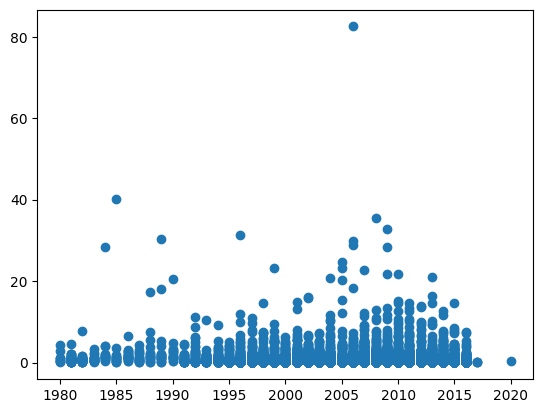

In [5]:
plt.scatter(df[["Year_of_Release"]], df[["Global_Sales"]])
print(df.corr(method='pearson',numeric_only=True))

As shown in the graph, there are clear outliers which do not fit with the curve which when removed can give a better
understanding of the graph's correlation.

                 Global_Sales  Year_of_Release
Global_Sales         1.000000        -0.091568
Year_of_Release     -0.091568         1.000000


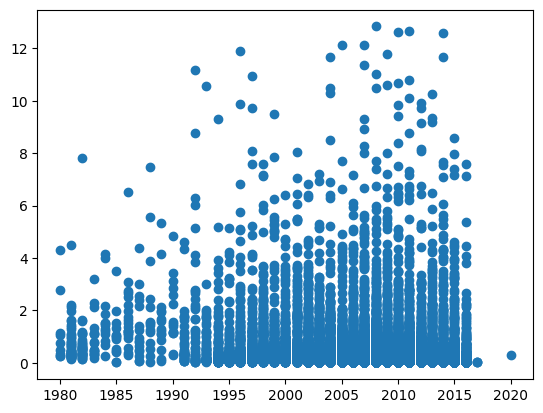

In [16]:
z = np.abs(stats.zscore(df[["Year_of_Release", "Global_Sales"]]))
data_clean = df[(z<8).all(axis=1)]
data_clean.shape
plt.scatter(data_clean[["Year_of_Release"]], data_clean[["Global_Sales"]])
print(data_clean.corr(method='pearson',numeric_only=True))


With the outliers removed the shape of the scatter becomes slightly more clear but there appears to still be no correlation between the two. Using an alternative method, known as Spearman rank correlation, was used to check whether the graph can be described by a monotonic funciton. However, there is still nothing to suggest a genuine correlation.

In [14]:
print(data_clean.corr(method='spearman',numeric_only=True))

                 Global_Sales  Year_of_Release
Global_Sales         1.000000        -0.160998
Year_of_Release     -0.160998         1.000000
